<a href="https://colab.research.google.com/github/DiegoCarrillo19/DNA-base-and-codon-counter/blob/main/An%C3%A1lisis_descriptivo_secuencias_rotavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importar librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
%matplotlib inline

KeyboardInterrupt: ignored

In [ ]:
#caragar dataframes
data = pd.read_csv('Rotavirus database.csv')
data.head()

,accession,length,type,genotype,host,country,isolation,collection_date,release_date,name
0,AB573074,1476,NSP1,A13,Bos taurus,Japan,feces,2008/06,2010/07/28,Bovine rotavirus A NSP1 gene for non-structura...
1,AB573075,954,NSP2,N2,Bos taurus,Japan,feces,2008/06,2010/07/28,Bovine rotavirus A NSP2 gene for non-structura...
2,AB573076,942,NSP3,T9,Bos taurus,Japan,feces,2008/06,2010/07/28,Bovine rotavirus A NSP3 gene for non-structura...
3,AB573077,528,NSP4,E2,Bos taurus,Japan,feces,2008/06,2010/07/28,Bovine rotavirus A NSP4 gene for non-structura...
4,AB573078,597,NSP5/6,H3,Bos taurus,Japan,feces,2008/06,2010/07/28,Bovine rotavirus A NSP5 gene for non-structura...


In [ ]:
#Data cleaning
data.dropna()
data.head()

,accession,length,type,genotype,host,country,isolation,collection_date,release_date,name
0,AB573074,1476,NSP1,A13,Bos taurus,Japan,feces,2008/06,2010/07/28,Bovine rotavirus A NSP1 gene for non-structura...
1,AB573075,954,NSP2,N2,Bos taurus,Japan,feces,2008/06,2010/07/28,Bovine rotavirus A NSP2 gene for non-structura...
2,AB573076,942,NSP3,T9,Bos taurus,Japan,feces,2008/06,2010/07/28,Bovine rotavirus A NSP3 gene for non-structura...
3,AB573077,528,NSP4,E2,Bos taurus,Japan,feces,2008/06,2010/07/28,Bovine rotavirus A NSP4 gene for non-structura...
4,AB573078,597,NSP5/6,H3,Bos taurus,Japan,feces,2008/06,2010/07/28,Bovine rotavirus A NSP5 gene for non-structura...


In [ ]:
Gen = data['type'].value_counts()
Host = data['host'].value_counts()
Pais = data['country'].value_counts()
Fecha = data['collection_date'].value_counts()  

In [ ]:
print (Pais)

USA                                 2046
Australia                           1104
South Africa                         949
Canada                               689
Belgium                              662
China                                461
India                                310
Thailand                             296
Italy                                213
Japan                                165
Ethiopia                             108
Togo                                 107
Zimbabwe                             100
Nicaragua                             93
Zambia                                93
Kenya                                 87
South Korea                           83
Spain                                 82
Bangladesh                            73
Argentina                             66
Cameroon                              65
Democratic Republic of the Congo      64
Myanmar                               62
Senegal                               53
Uganda          

In [ ]:
#Frecuencia de los paises en el total de las secuencias
Pais = Pais.rename_axis("Pais")
Pais = Pais.reset_index(name= "Frecuencia")
Pais


,Pais,Frecuencia
0,USA,2046
1,Australia,1104
2,South Africa,949
3,Canada,689
4,Belgium,662
5,China,461
6,India,310
7,Thailand,296
8,Italy,213
9,Japan,165


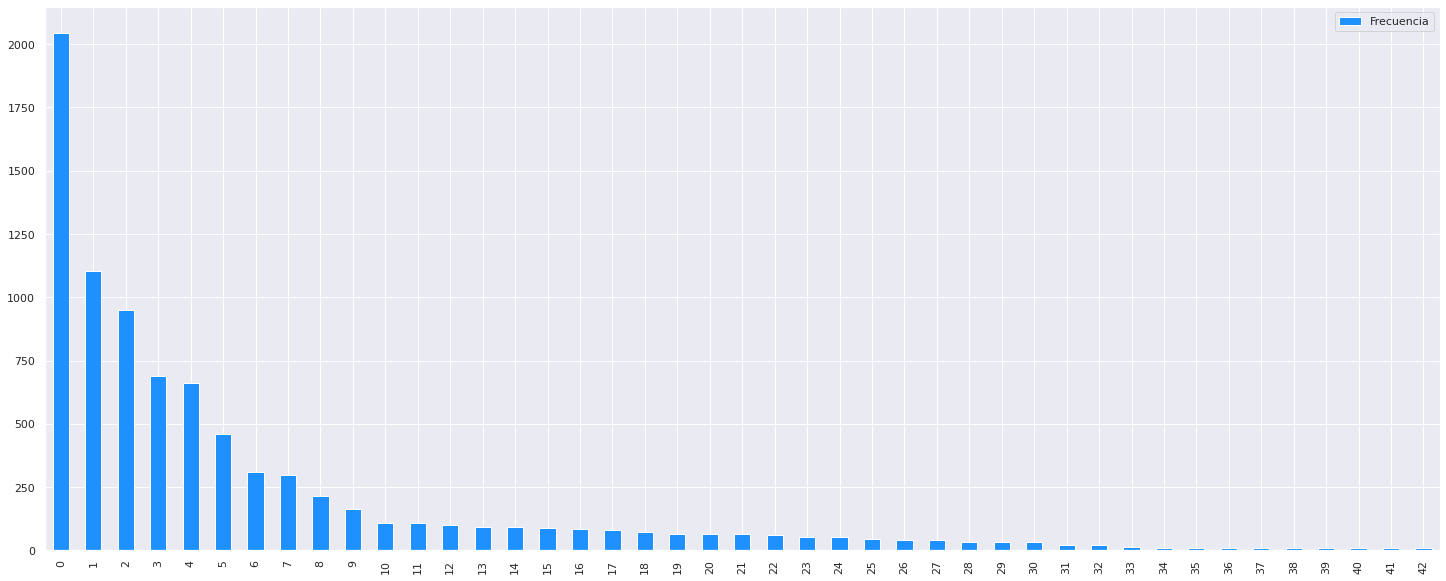

In [ ]:
sns.set_theme()
Pais.plot(kind = 'bar', color = 'dodgerblue', figsize=(25, 10)) 

In [ ]:
#generar el codigo de tres letras
!pip install pycountry
import pycountry
def get_alpha_3(location):
    try:
        return pycountry.countries.get (name=location).alpha_3
    except:
        return None
        
Pais ['Code']= Pais['Pais'].apply(lambda x: get_alpha_3(x))
print (Pais.head)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 65.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=2ef051a356ab54f50fca1a8ab090235e6b06e7a0bbbc42d1965ed218b7c69dea
  Stored in directory: /root/.cache/pip/wheels/e2/aa/0f/c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry
<bound method NDFrame.head of                                 Pais  Frecuencia  Code
0                                USA        2046  None
1                          Australia        1104   AUS
2                       South Africa         949   ZAF
3                             Canada         689   CAN
4                            Belgium         662   BEL
5                        

In [ ]:
#Cambiar manual a codigo de tres letras
Pais.at[0,'Code']= "USA"
Pais.at[16,'Code']= "PRK"
Pais.at[21,'Code']= "COD"
Pais.at[38,'Code']= "SWZ"
Pais

,Pais,Frecuencia,Code
0,USA,2046,USA
1,Australia,1104,AUS
2,South Africa,949,ZAF
3,Canada,689,CAN
4,Belgium,662,BEL
5,China,461,CHN
6,India,310,IND
7,Thailand,296,THA
8,Italy,213,ITA
9,Japan,165,JPN


In [ ]:
#Vizualizar los datos en choropleth(
import plotly.express as px
fig = px.choropleth(Pais,locations='Code',
                    color='Frecuencia',
                    hover_name='Code', 
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

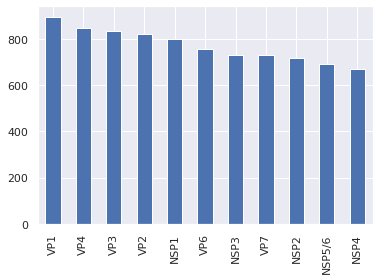

In [ ]:
#Frecuencia de los paises en el total de las secuencias
sns.set_theme()
data['type'].value_counts().plot(kind='bar')

In [ ]:
genotypes_frequency = data.groupby ('type')	['genotype'].value_counts()
print (genotypes_frequency)

type  genotype         
NSP1  A1                   596
      A2                   142
      A3                    22
      A8                    11
      A11                    8
                          ... 
VP7   G19                    1
      G23                    1
      G28                    1
      G7                     1
      genotype: G12P[6]      1
Name: genotype, Length: 129, dtype: int64


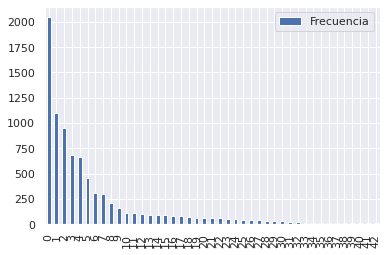

In [ ]:
Pais.plot(kind = 'bar')